### Packages and modules

In [351]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
from sklearn.metrics import accuracy_score
from afinn import Afinn
from textblob import TextBlob
from sklearn.model_selection import train_test_split

In [352]:
#Read the data file
data = pd.read_excel('Ave_endGame1.xlsx')

In [353]:
#Display first 10 rows
data.head(10)

,Unnamed: 0,Datetime,Tweet,ID,likes_count,Username,verified,followers,friends,favourites,statuses,location
0,0,2021-05-02 15:28:46+00:00,Love Rosie\nWhite Chicks\nAvengers: Endgame\nS...,1388878138097070080,0,pit,False,3522,417,45690,51511,Malaysia
1,1,2021-05-02 15:27:18+00:00,@tacticaldipshit Avengers endgame probably,1388877768864049920,0,B1ackHeart,False,51,191,2641,1138,NaN
2,2,2021-05-02 15:25:04+00:00,Titanic ? Avengers Endgame ? ðŸ¤”ðŸ¤” https://...,1388877203367239936,0,Eren,False,87,97,1112,23655,"Paris, France"
3,3,2021-05-02 15:22:23+00:00,"23 years ago, the Battle of Hogwarts took plac...",1388876530999300096,0,Maria Manovski,False,233,3121,17180,4581,"Detroit, MI"
4,4,2021-05-02 15:22:21+00:00,||: quick reminder that those two Avengers sca...,1388876521041959936,17,â€” WANDA MAXIMOFF á—¢,False,4064,4513,27259,12586,NaN
5,5,2021-05-02 15:20:11+00:00,Avengers Infinity War\nInception\nAvengers End...,1388875977179150080,2,Daredevil (Ø³Ø§Ø³Ù¾Ù†Ø¯ Ø´Ø¯ Farnam),False,113,276,12,886,NaN
6,6,2021-05-02 15:16:02+00:00,SUNDAY SHELFIES \n\nAvengers: Endgame came out...,1388874930318560000,1,ðŸ¤ª playing_with_myself ðŸ§,False,244,269,2851,491,"Los Angeles, CA"
7,7,2021-05-02 15:14:29+00:00,avengers : endgame could have been an email,1388874543419229952,4,ilian âœª,False,1172,775,15297,2608,he & him â€¢ sixteen
8,8,2021-05-02 15:12:06+00:00,"@DanaSchwartzzz Just imagine, ""I was enjoying...",1388873942287399936,0,Bruno Felipe Silva,False,93,239,13525,12589,Natal
9,9,2021-05-02 15:10:03+00:00,"""Thanos Was Right"" T-Shirts @TeePublic \nâ €\...",1388873424592849920,0,UNIVERSE31 aka CINE31,False,1525,4985,15380,79842,OlhÃ£o - Portugal


In [354]:
#Sort the data in desending order based on likes count.
data.sort_values(["likes_count"], axis=0,
                 ascending=False, inplace=True)

In [355]:
#View datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100001 entries, 71224 to 0
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   100001 non-null  int64 
 1   Datetime     100001 non-null  object
 2   Tweet        99987 non-null   object
 3   ID           100001 non-null  int64 
 4   likes_count  100001 non-null  int64 
 5   Username     99987 non-null   object
 6   verified     100001 non-null  object
 7   followers    100001 non-null  int64 
 8   friends      100001 non-null  int64 
 9   favourites   100001 non-null  int64 
 10  statuses     100001 non-null  int64 
 11  location     71833 non-null   object
dtypes: int64(7), object(5)
memory usage: 9.9+ MB


## Data preprocessing

### Missing value analysis

In [356]:
#MISSING VALUE ANALYSIS
missing_val = pd.DataFrame(data.isnull().sum())
missing_val = (missing_val/len(data))*100
missing_val.reset_index()

missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percent'})
missing_val

,Missing_percent
Unnamed: 0,0.000000
Datetime,0.000000
Tweet,0.014000
ID,0.000000
likes_count,0.000000
Username,0.014000
verified,0.000000
followers,0.000000
friends,0.000000
favourites,0.000000


In [357]:
#DROP RECORDS WITH MISSING DATA IN THE COLUMNS.
data=data.dropna(subset=['Tweet'])
data=data.dropna(subset=['Username'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99973 entries, 71224 to 0
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   99973 non-null  int64 
 1   Datetime     99973 non-null  object
 2   Tweet        99973 non-null  object
 3   ID           99973 non-null  int64 
 4   likes_count  99973 non-null  int64 
 5   Username     99973 non-null  object
 6   verified     99973 non-null  object
 7   followers    99973 non-null  int64 
 8   friends      99973 non-null  int64 
 9   favourites   99973 non-null  int64 
 10  statuses     99973 non-null  int64 
 11  location     71812 non-null  object
dtypes: int64(7), object(5)
memory usage: 9.9+ MB


In [358]:
# NULL VALUE IMPUTATION FOR THE VARIABLE 'LOCATION' USING MODE METHOD.
data = data.fillna(data['location'].value_counts().index[0])

### Feature Engineering

In [359]:
data['location']=data['location'].astype('category')
data['verified']=data['verified'].astype('category') 
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [360]:
import datetime
data['year'] = data['Datetime'].dt.year
data['month'] = data['Datetime'].dt.month
data['day'] = data['Datetime'].dt.day
data['hour'] = data['Datetime'].dt.hour

### Feature Selection using correlation test

<AxesSubplot:>

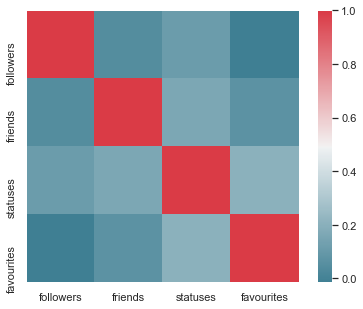

In [361]:
cnames = ['followers','friends','statuses','favourites']
corr = data.loc[:,cnames]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr1 = corr.corr()

#Plot using seaborn library
sns.heatmap(corr1, mask=np.zeros_like(corr1, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [363]:
# FINAL CSV FILE AFTER PREPROCESSING
data.to_csv('Final_data.csv')

In [201]:
data1 = pd.read_csv('Final_data.csv')

## EXPLORATORY DATA ANALYSIS

In [364]:
#unique users count
len(pd.unique(data1["Username"]))

65647

In [365]:
#count of users with followers more than 50000
print("Count of users with followers more than 50000 is->",
      data1[data1['followers'] > 50000]['Username'].count())
print("Count of users with Statuses more than 50000 is->",
      data1[data1['statuses'] > 50000]['Username'].count())
print("Count of tweets with likes more than 50000 is->",
      data1[data1['likes_count'] > 50000]['Tweet'].count())

Count of users with followers more than 50000 is-> 2610
Count of users with Statuses more than 50000 is-> 17684
Count of tweets with likes more than 50000 is-> 5


<AxesSubplot:title={'center':'Tweet counts'}, xlabel='Year', ylabel='Tweet Count'>

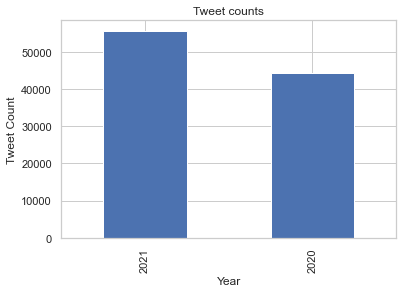

In [366]:
#BAR GRAPH SHOWING TWEET COUNTS 
plt.xlabel('Year')
# naming the y axis
plt.ylabel('Tweet Count')
# giving a title to my graph
plt.title('Tweet counts')
data1['year'].value_counts().plot(kind='bar')

In [367]:
#CONVERTING THE VALUES IN VERIFIED COLUMN FOR OUR CONVENIENCE.
data1["verified"].replace({"True": "1", "False": "0", True:'1', False: '0', ' ': '0'}, inplace=True)
print (data1['verified'].unique())
data.info()

['0' '1']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99973 entries, 71224 to 0
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Unnamed: 0   99973 non-null  int64              
 1   Datetime     99973 non-null  datetime64[ns, UTC]
 2   Tweet        99973 non-null  object             
 3   ID           99973 non-null  int64              
 4   likes_count  99973 non-null  int64              
 5   Username     99973 non-null  object             
 6   verified     99973 non-null  category           
 7   followers    99973 non-null  int64              
 8   friends      99973 non-null  int64              
 9   favourites   99973 non-null  int64              
 10  statuses     99973 non-null  int64              
 11  location     99973 non-null  category           
 12  year         99973 non-null  int64              
 13  month        99973 non-null  int64              
 14  day         

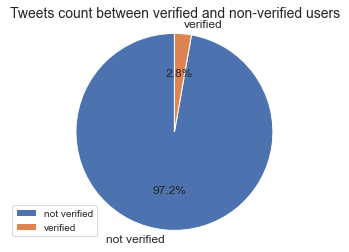

In [368]:
#Pie chart between verified and non-verified
data1['verified'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%',labels = ['not verified','verified'],textprops={'fontsize' : 12})
plt.legend(loc=3,fontsize=10)
plt.ylabel('')
plt.title('Tweets count between verified and non-verified users',fontsize = 14)
plt.axis('equal')

#lt.subplots_adjust(wspace=4)
plt.show()

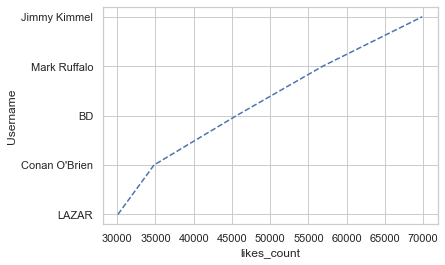

In [371]:
#DOTTED LINE PLOT BETWEEN USERS AND LIKES FOR VERIFIED USERS
data_new = data1[data1['verified'] == '1']
data_new = data_new.head(5)
n = 11
x = data_new['likes_count']
y = data_new['Username']

ax = sns.lineplot(x,y)

# Might need to loop through the list if there are multiple lines on the plot
ax.lines[0].set_linestyle("--")

plt.show()
#sns.lineplot(y="Username", x="likes_count", data=data_new)
#plt.show()

In [372]:
#Users with more friends
s= []
data_new1 = data2[data2['friends'] > 25000]
#data_new1 = data_new1.head(15)
s.append(data_new1['Username'].count())
data_new1 = data2[data2['friends'] > 50000]
#data_new1 = data_new1.head(15)
s.append(data_new1['Username'].count())
data_new1 = data2[data2['friends'] > 75000]
#data_new1 = data_new1.head(15)
s.append(data_new1['Username'].count())
data_new1 = data2[data2['friends'] > 100000]
#data_new1 = data_new1.head(15)
s.append(data_new1['Username'].count())
labs = ['>25000','>50000','>75000','>100000']

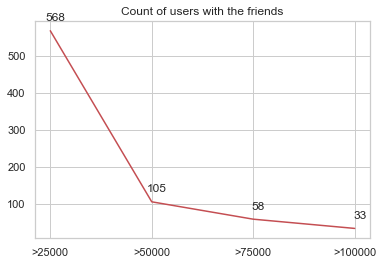

In [373]:
# PLOT BETWEEN FRIENDS COUNT RANGE AND COUNT OF USERS
plt.plot(labs,s,'r')
for x,y in zip(labs,s):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(5,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title('Count of users with the friends')
plt.show()

## Sentiment Analysis

In [374]:
#IMPLEMENTED TEXTBLOB TO CATEGORIZE THE SENTIMENTS 
data1['Tweet']=data1['Tweet'].astype('string')
#TextBlob
data1['sentiment'] = data1['Tweet'].apply(lambda tweet: TextBlob(tweet).polarity)
data1['sentiment'] = [1 if sc > 0 
                      else 0  for sc in data1['sentiment'] ]

In [375]:
# SPLITTING TRAIN AND TEST DATA
y = data1.sentiment
x = data1.drop('sentiment',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train = x_train.drop('Datetime',axis = 1)
x_test = x_test.drop('Datetime',axis = 1)


In [376]:
data1.to_csv('Final_data_sentiment.csv')

In [377]:
data2 = pd.read_csv('Final_data_sentiment.csv')

In [378]:
#CONVERSION TO DATAFRAMES FOR OUR CONVENIENCE
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [379]:
#VADER IMPLEMENTATION
analyzer = SentimentIntensityAnalyzer()

def text_sentiment_vader(text):
    vs = analyzer.polarity_scores(text)
    return int(vs.get("compound")>0)
 
predictions = x_test.Tweet.map(lambda x : text_sentiment_vader(x))

In [380]:
predictions1 = pd.DataFrame(predictions)

In [381]:
targets = y_test.sentiment

In [382]:
accuracy_score(predictions.values,targets)

0.7009752438109528

In [383]:
#AFINN IMPLEMENTATION
afn = Afinn()
  
#creating list sentences
tw_data = list(x_test['Tweet'])
# compute scores (polarity) and labels
scores = [afn.score(article) for article in tw_data]
sentiment = [1 if score > 0 
                          else 0 for score in scores]

In [384]:
accuracy_score(sentiment,y_test)

0.691772943235809

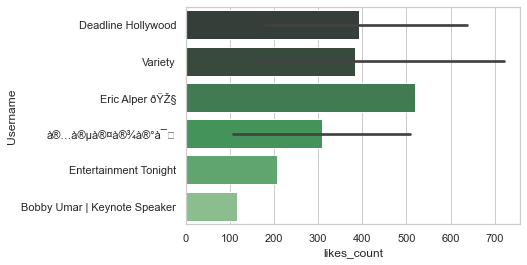

In [386]:
# PLOT BETWEEN USERS HAVING MORE FRIENDS AND LIKE COUNT.
sns.set(style="whitegrid", color_codes=True)
data_new1 = data_new1.head(15)
d = data_new1.groupby("sentiment").size()   # data underlying bar plot in question

pal = sns.color_palette("Greens_d", len(data_new1))
rank = data_new1.friends.argsort()   
sns.barplot(y=data_new1.Username, x=data_new1.likes_count, palette=np.array(pal[::-1])[rank])

plt.show()